
# Disease Prediction Analysis

This notebook contains the analysis and visualizations of various disease datasets provided. The analysis includes:
- Data Cleaning
- Exploratory Data Analysis (EDA)
- Predictive Modeling using RandomForest
- Evaluation of the model


In [2]:

# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load datasets
file_paths = {
    "Anthrax": 'D:\VIT AP\FALL SEMESTER 2024\CAPSTONE PROJECT\Datasets\ECDC_surveillance_data_Anthrax.csv',
    "Antimicrobial_resistance": 'D:\VIT AP\FALL SEMESTER 2024\CAPSTONE PROJECT\Datasets\ECDC_surveillance_data_Antimicrobial_resistance.csv',
    "Arenavirus_infection": 'D:\VIT AP\FALL SEMESTER 2024\CAPSTONE PROJECT\Datasets\ECDC_surveillance_data_Arenavirus_infection.csv',
    "Botulism": 'D:\VIT AP\FALL SEMESTER 2024\CAPSTONE PROJECT\Datasets\ECDC_surveillance_data_Botulism.csv',
    "Brucellosis": 'D:\VIT AP\FALL SEMESTER 2024\CAPSTONE PROJECT\Datasets\ECDC_surveillance_data_Brucellosis.csv',
    "Campylobacteriosis": 'D:\VIT AP\FALL SEMESTER 2024\CAPSTONE PROJECT\Datasets\ECDC_surveillance_data_Campylobacteriosis.csv',
    "Chikungunya_virus_disease": 'D:\VIT AP\FALL SEMESTER 2024\CAPSTONE PROJECT\Datasets\ECDC_surveillance_data_Chikungunya_virus_disease.csv',
    "Chlamydia_infection_lymphogranuloma_venereum": 'D:\VIT AP\FALL SEMESTER 2024\CAPSTONE PROJECT\Datasets\ECDC_surveillance_data_Chlamydia_infection _lymphogranuloma_venereum.csv',
    "Chlamydia_infection": 'D:\VIT AP\FALL SEMESTER 2024\CAPSTONE PROJECT\Datasets\ECDC_surveillance_data_Chlamydia_infection.csv',
    "Cholera": 'D:\VIT AP\FALL SEMESTER 2024\CAPSTONE PROJECT\Datasets\ECDC_surveillance_data_Cholera.csv',
}

# Read each dataset into a dictionary
datasets = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Function to clean individual datasets
def clean_dataset(df):
    # Drop TxtValue if it exists
    df = df.drop(columns=["TxtValue"], errors='ignore')
    
    # Convert NumValue to numeric, invalid parsing will be set as NaN
    df['NumValue'] = pd.to_numeric(df['NumValue'], errors='coerce')
    
    # Drop rows with NaN in NumValue
    df_cleaned = df.dropna(subset=['NumValue'])
    
    return df_cleaned

# Clean each dataset
datasets_cleaned = {name: clean_dataset(data) for name, data in datasets.items()}

# Concatenate all cleaned datasets
combined_data = pd.concat(datasets_cleaned.values())

# Display the first few rows
combined_data.head()


,HealthTopic,Population,Indicator,Unit,Time,RegionCode,RegionName,NumValue
0,Anthrax,Confirmed cases,Reported cases,N,2007,AT,Austria,0.0
1,Anthrax,Confirmed cases,Reported cases,N,2007,BE,Belgium,0.0
2,Anthrax,Confirmed cases,Reported cases,N,2007,BG,Bulgaria,1.0
3,Anthrax,Confirmed cases,Reported cases,N,2007,CY,Cyprus,0.0
4,Anthrax,Confirmed cases,Reported cases,N,2007,CZ,Czechia,0.0


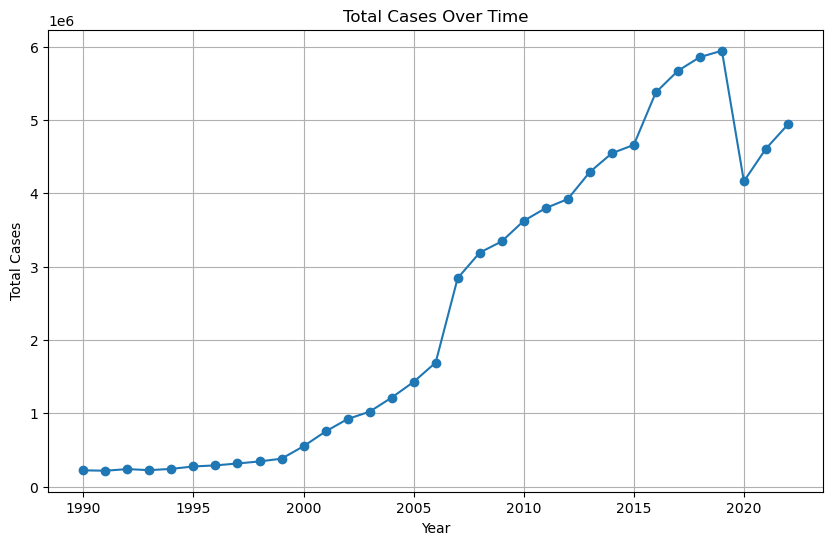

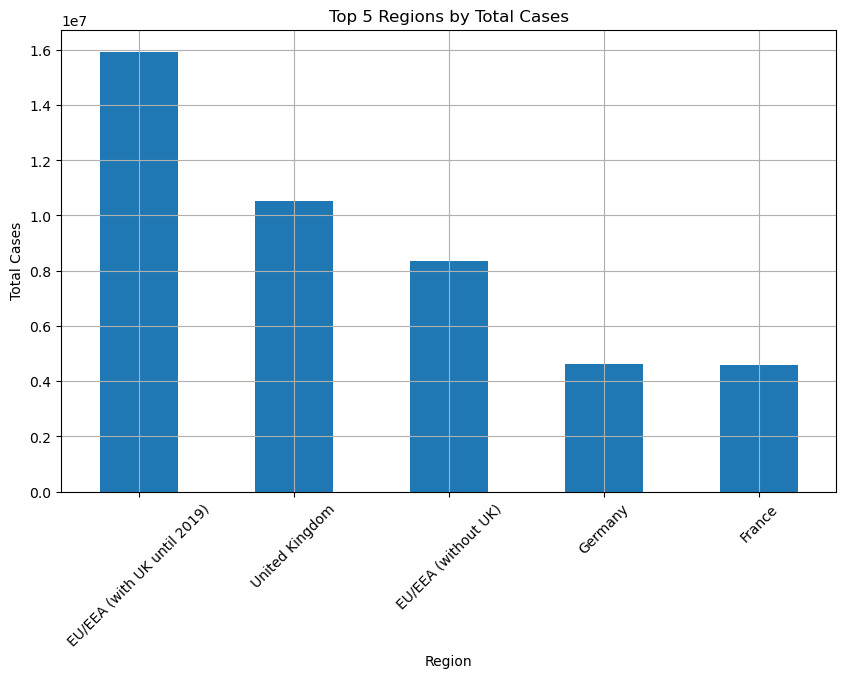

In [3]:

# Exploratory Data Analysis (EDA)

# Total cases over time plot
combined_data.groupby('Time')['NumValue'].sum().plot(kind='line', figsize=(10, 6), marker='o', title='Total Cases Over Time')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.grid(True)
plt.show()

# Top 5 regions by total cases
top_regions = combined_data.groupby('RegionName')['NumValue'].sum().sort_values(ascending=False).head(5)
top_regions.plot(kind='bar', figsize=(10, 6), title='Top 5 Regions by Total Cases')
plt.xlabel('Region')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [4]:

# Feature selection and predictive modeling

# Selecting relevant features for modeling
X_full = combined_data[['Time', 'RegionCode', 'Population', 'Indicator', 'HealthTopic']]

# Perform one-hot encoding on categorical variables
X_full_encoded = pd.get_dummies(X_full, columns=['RegionCode', 'Population', 'Indicator', 'HealthTopic'], drop_first=True)

# Target variable
y = combined_data['NumValue']

# Train-test split
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForest model
rf_model_optimized = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
rf_model_optimized.fit(X_train_full, y_train_full)

# Make predictions
y_pred_optimized = rf_model_optimized.predict(X_test_full)

# Evaluate the model
mse_optimized = mean_squared_error(y_test_full, y_pred_optimized)
r2_optimized = r2_score(y_test_full, y_pred_optimized)

mse_optimized, r2_optimized


(1416846.164411855, 0.9737976841503159)